**<p style="font-size:30px;">Statistical Inference and Data Visualization for the Humanities</p>**

# Data Visualization

## Why visualize data?

Data visualization:

- Facilitates Exploration
- Identifies Relationships and Correlations
- Enhances Communication
- Supports Storytelling

## Categories of data visualization

**Visualizing data can serve one of the following purposes:**

  
- Explore distributions:
    - Histograms
    - Box plots
- Draw comparisons:
    - Pie charts
    - Stacked bar charts

### Explore Relationships between two or more features:

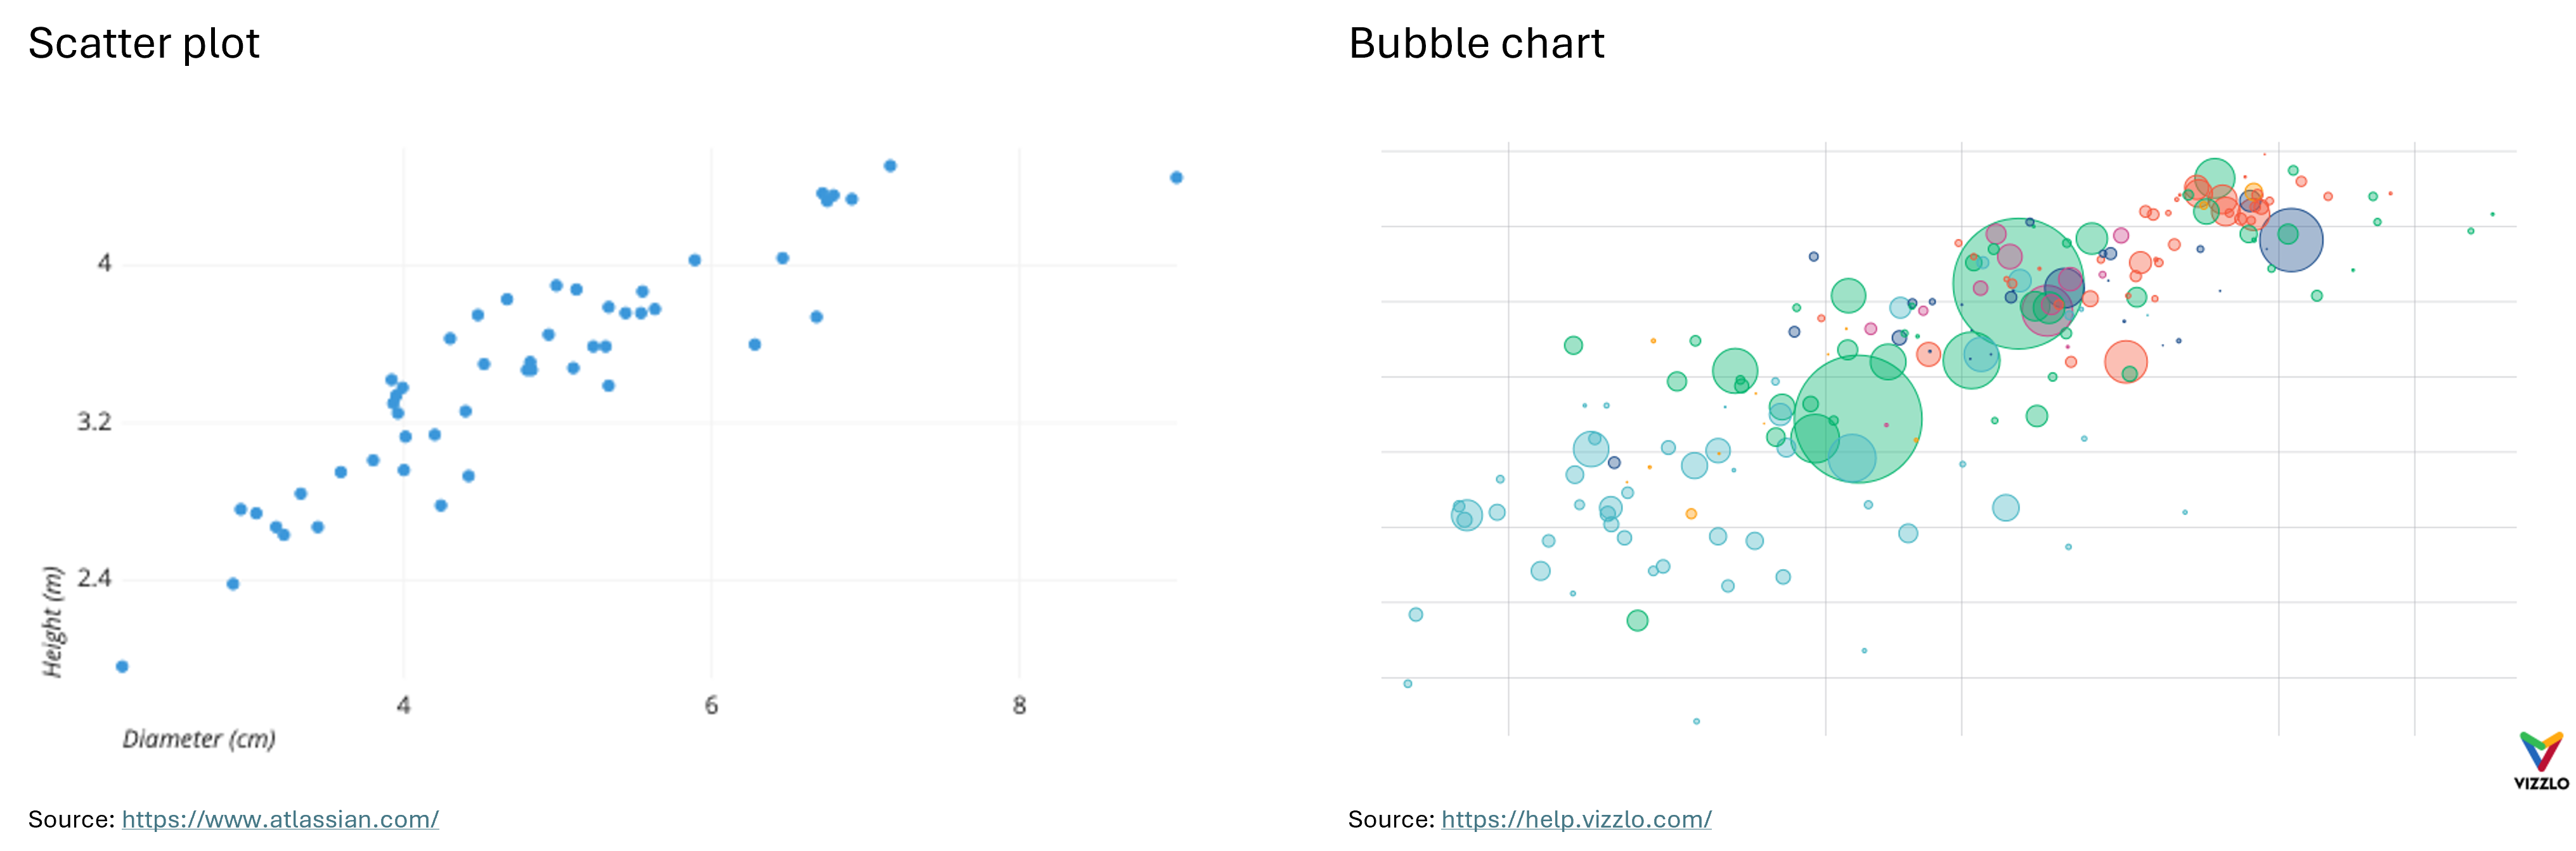

### Compare different measures or trends:

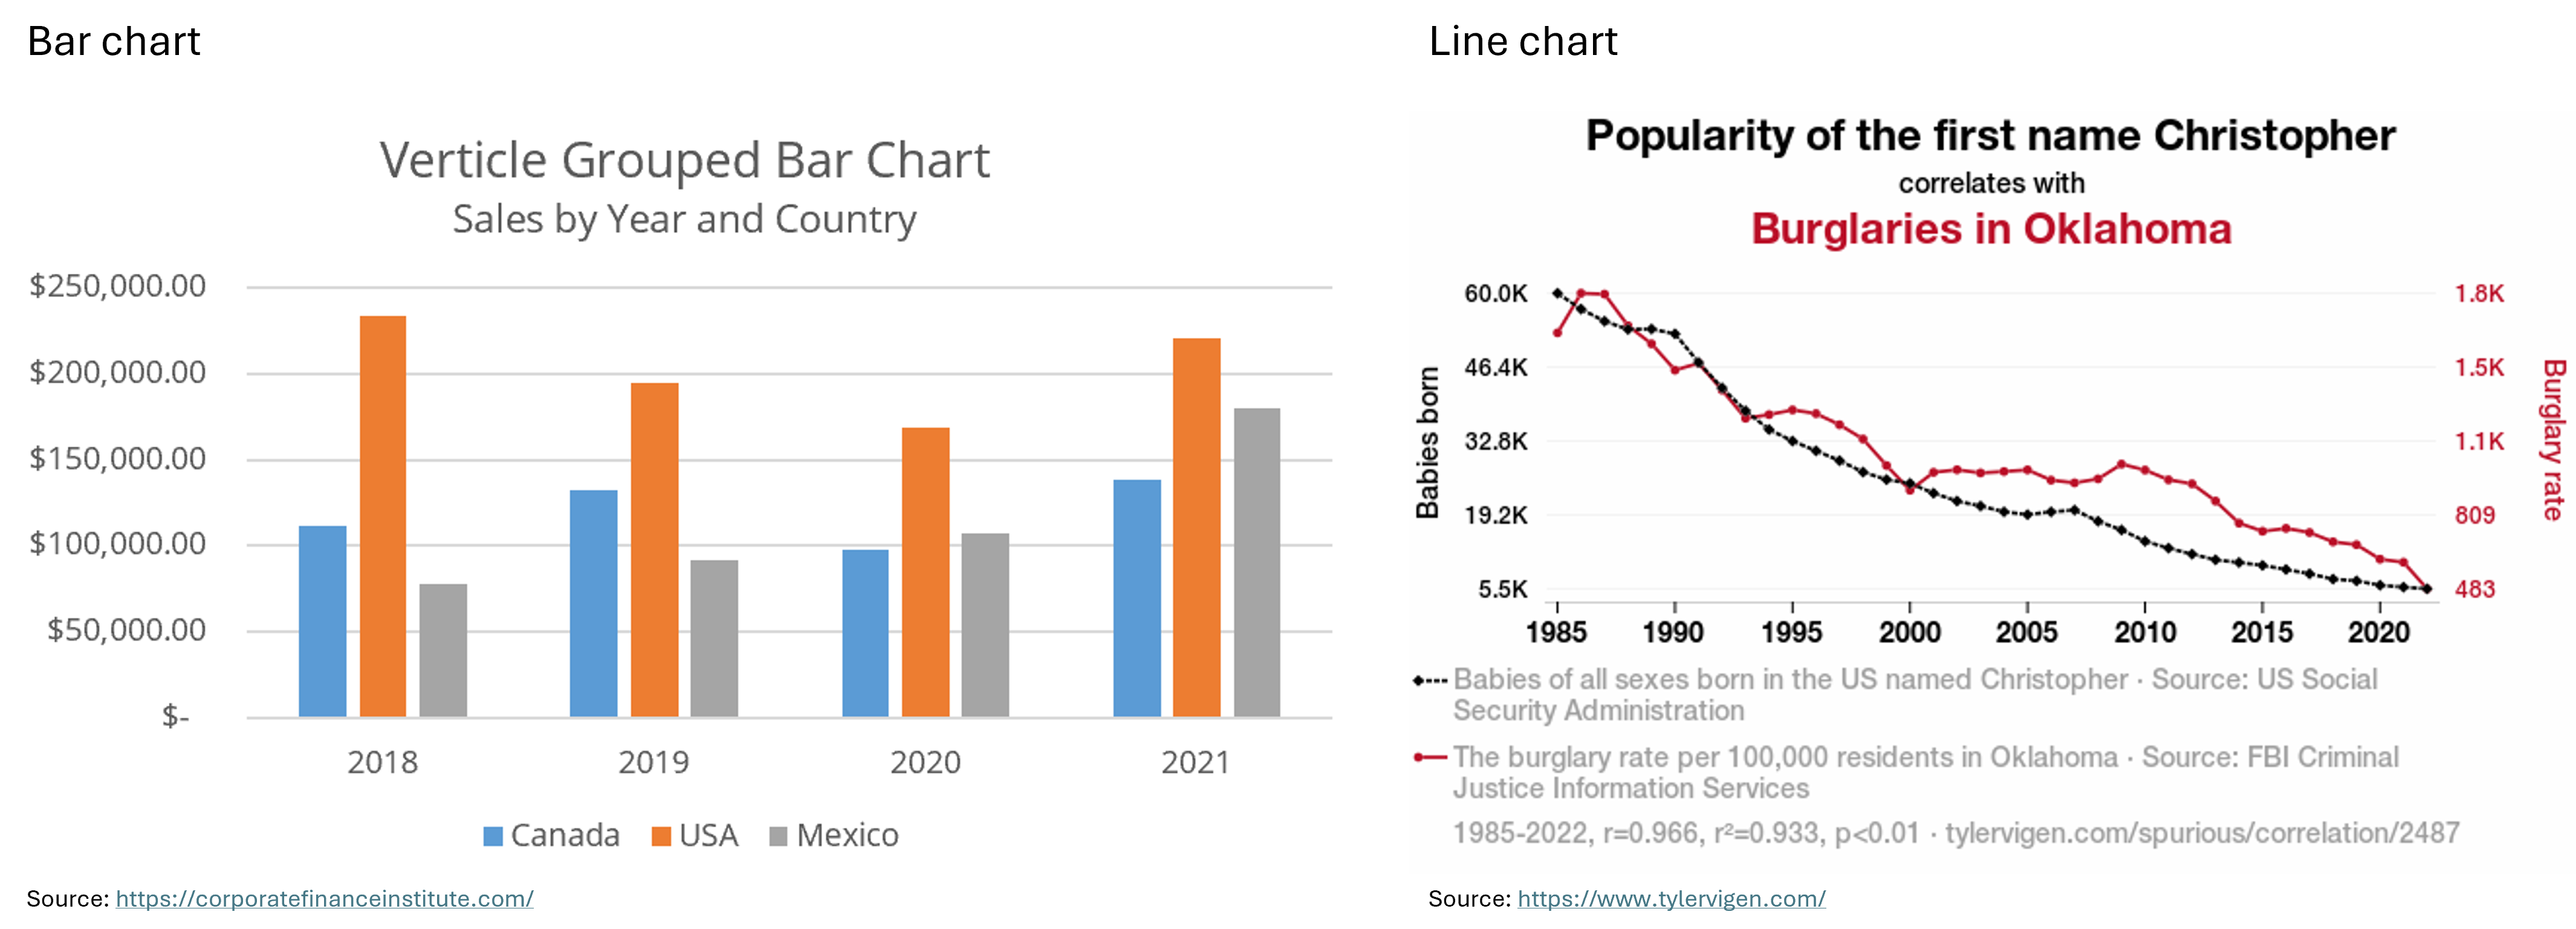

# What is Statistical Inference and Why do Digital Humanists need it?

**Statistical Inference:** the theory, methods, and practice of forming judgements about the parameters of a population and the reliability of statistical relationships, typically on the basis of <u> random sampling </u>. (Oxford Dictionary)

The wine quality dataset: https://archive.ics.uci.edu/dataset/186/wine+quality

Most Streamed Spotify Songs 2024: https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024?resource=download 

114000 Spotify Songs: https://www.kaggle.com/datasets/priyamchoksi/spotify-dataset-114k-songs

In [15]:
import pandas as pd

In [37]:
spotify_df= pd.read_csv('./data/114000_spotify_songs.csv')
spotify_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [34]:
list(spotify_df.columns)

['Unnamed: 0',
 'track_id',
 'artists',
 'album_name',
 'track_name',
 'popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'track_genre']

In [33]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [1]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

In [7]:
# # Function to scrape individual movie details
# def scrape_movie_details(movie_url):
#     response = requests.get(movie_url)
#     print("Access status:", response.status_code)
#     if response.status_code == 200:
#         print("Access granted. Scraping successful.")
#         soup = BeautifulSoup(response.text, 'html.parser')
        
#         title = soup.find('h1').text.strip()
#         year = soup.find('span', class_='TitleBlockMetaData__ListItemText-sc-12ein40-2 jedhex').text.strip()
#         actors = [actor.text.strip() for actor in soup.find_all('a', class_='StyledComponents__ActorName-y9ygcu-1 eyqFnv')]
#         genre = [genre.text.strip() for genre in soup.find_all('a', class_='GenresAndPlot__GenreChip-cum89p-3 fzmeux ipc-chip ipc-chip--on-baseAlt')]
#         rating = soup.find('span', class_='AggregateRatingButton__RatingScore-sc-1ll29m0-1 iTLWoV').text.strip()
        
#         return {
#             'title': title,
#             'year': year,
#             'actors': actors[:5],  # Select first 5 actors
#             'genre': genre,
#             'rating': rating
#         }
#     else:
#         print("Access denied. Scraping failed.1")
#         return None

In [8]:
# # Function to scrape the list of movies
# def scrape_movie_list(url):
#     response = requests.get(url)
#     print("Access status:", response.status_code)
#     if response.status_code == 200:
#         print("Access granted. Scraping successful.")
#         soup = BeautifulSoup(response.text, 'html.parser')
#         movie_list = soup.find_all('div', class_='lister-item-content')

#         movie_details = []
#         for movie in movie_list:
#             movie_link = movie.find('a', href=True)['href']
#             movie_url = f'https://www.imdb.com{movie_link}'
#             movie_info = scrape_movie_details(movie_url)
#             if movie_info:
#                 movie_details.append(movie_info)

#         return movie_details
#     else:
#         print("Access denied. Scraping failed.2")
#         return None

In [9]:
# # Main function to scrape IMDb
# def scrape_imdb(url):
#     movie_details = scrape_movie_list(url)
#     return movie_details

In [25]:
# # The search URL includes movies made in the US in the last three months of the year 2000:
# url= 'https://www.imdb.com/search/title/?release_date=2000-01-01,2000-01-15&country_of_origin=US'

# imdb_data = scrape_imdb(url)
# imdb_data

# # Print the data
# # for movie in imdb_data:
# #     print(movie)